In [4]:
import pandas_datareader as web
import ta, datetime
import numpy as np

In [85]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2019, 9, 1)
df = web.DataReader("^NSEI", 'yahoo', start, end)

In [86]:
ma10 = ta.trend.SMAIndicator(df['Adj Close'], 10).sma_indicator()
atr = ta.volatility.AverageTrueRange(df['High'],df['Low'],df['Adj Close'], 5).average_true_range()
std = df['Adj Close'].rolling(window=5).std()
#df['highc50'] = df['Adj Close'][-50:].idxmax() 
#df['lowc50'] = df['Adj Close'][-50:].idxmin()
df['MA10'] = ma10.sort_values(ascending=True)
df['ATR'] = atr.sort_values(ascending=True)
df['STD'] = std


#drop 50 records 
#df =  df.iloc[30:]
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,MA10,ATR,STD
Date,,,,,,,,,
2017-01-13,8461.049805,8373.150391,8457.650391,8400.349609,185300.0,8400.349609,8279.269922,68.152318,76.198781
2017-01-16,8426.700195,8374.400391,8390.950195,8412.799805,124100.0,8412.799805,8302.599902,64.981815,51.387268
2017-01-17,8440.900391,8378.299805,8415.049805,8398.000000,122000.0,8398.000000,8323.174902,64.505569,12.186134
2017-01-18,8460.299805,8397.400391,8403.849609,8417.000000,163800.0,8417.000000,8345.824902,64.184338,8.044891
2017-01-19,8445.150391,8404.049805,8418.400391,8435.099609,165900.0,8435.099609,8361.954883,59.567588,14.906811
...,...,...,...,...,...,...,...,...,...
2019-08-26,11070.299805,10756.549805,11000.299805,11057.849609,684100.0,11057.849609,10973.084961,198.141325,130.662766
2019-08-27,11141.750000,11049.500000,11106.549805,11105.349609,685600.0,11105.349609,10972.654883,176.963060,152.429339
2019-08-28,11129.650391,10987.650391,11101.299805,11046.099609,550000.0,11046.099609,10984.679883,169.970448,160.399267


In [88]:
condition1 = df['STD'] > df['ATR'] 
#condition2 = df['Close'] > df['ma10']

df['Returns'] = (df['Close']-df['Open'])/df['Open']
df['Signal'] = np.where(df['STD'] > df['ATR'],1,0 )
df['Signal'] = df['Signal'].shift(1)
df.head(20)

,High,Low,Open,Close,Volume,Adj Close,MA10,ATR,STD,Returns,Signal
Date,,,,,,,,,,,
2017-01-02,8212.000000,8133.799805,8210.099609,8179.500000,118300.0,8179.500000,NaN,0.000000,NaN,-0.003727,NaN
2017-01-03,8219.099609,8148.600098,8196.049805,8192.250000,127300.0,8192.250000,NaN,0.000000,NaN,-0.000464,0.0
2017-01-04,8218.500000,8180.899902,8202.650391,8190.500000,132400.0,8190.500000,NaN,0.000000,NaN,-0.001481,0.0
2017-01-05,8282.650391,8223.700195,8226.650391,8273.799805,159100.0,8273.799805,NaN,0.000000,NaN,0.005731,0.0
2017-01-06,8306.849609,8233.250000,8281.849609,8243.799805,139400.0,8243.799805,NaN,70.409961,40.805038,-0.004594,0.0
2017-01-09,8263.000000,8227.750000,8259.349609,8236.049805,99100.0,8236.049805,NaN,63.377969,35.685343,-0.002821,0.0
2017-01-10,8293.799805,8261.000000,8262.700195,8288.599609,142900.0,8288.599609,NaN,62.252375,37.980724,0.003134,0.0
2017-01-11,8389.000000,8322.250000,8327.799805,8380.650391,186500.0,8380.650391,NaN,69.881978,57.836178,0.006346,0.0
2017-01-12,8417.200195,8382.299805,8391.049805,8407.200195,172600.0,8407.200195,NaN,63.215543,78.645553,0.001925,0.0


In [89]:
df.loc[df.Signal==1].describe()

,High,Low,Open,Close,Volume,Adj Close,MA10,ATR,STD,Returns,Signal
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,10446.534889,10343.311617,10401.832928,10393.215753,285401.369863,10393.215753,10410.270767,111.745864,113.858676,-0.000775,1.0
std,903.482665,882.715502,894.735887,888.692900,116931.808824,888.692900,926.550572,41.853024,55.393238,0.006600,0.0
min,8426.700195,8373.150391,8390.950195,8400.349609,0.000000,8400.349609,8279.269922,64.981815,33.075215,-0.020523,1.0
25%,9897.250000,9773.849609,9855.799805,9871.500000,200100.000000,9871.500000,9982.835059,78.918468,80.830559,-0.003950,1.0
50%,10533.549805,10333.849609,10390.299805,10460.099609,266500.000000,10460.099609,10694.679980,98.936464,104.734318,-0.001055,1.0
75%,11185.849609,11125.599609,11132.950195,11148.200195,365400.000000,11148.200195,11042.989941,125.525145,130.988271,0.002634,1.0
max,12041.150391,11682.799805,11901.299805,11737.900391,569000.000000,11737.900391,11804.299902,232.728945,305.731148,0.019728,1.0


In [90]:
strategyreturns = df.Signal * df.Returns
strategyreturns

Date
2017-01-02    NaN
2017-01-03   -0.0
2017-01-04   -0.0
2017-01-05    0.0
2017-01-06   -0.0
             ... 
2019-08-26    0.0
2019-08-27   -0.0
2019-08-28   -0.0
2019-08-29   -0.0
2019-08-30    0.0
Length: 655, dtype: float64

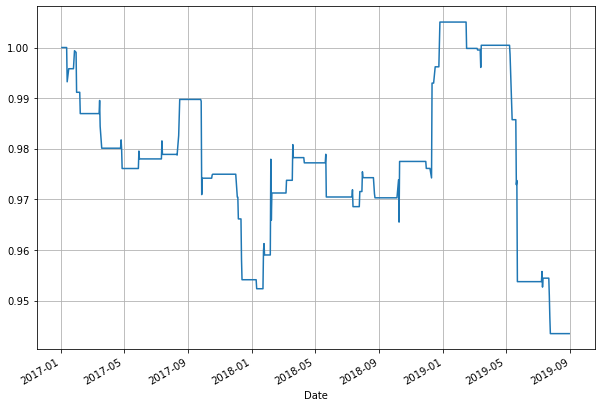

In [91]:
import matplotlib as plt
%matplotlib inline

(strategyreturns+1).cumprod().plot(figsize=(10,7),grid=True)


Start date,2017-01-02
End date,2019-08-30
Total months,31
,Backtest
Annual return,-2.2%
Cumulative returns,-5.7%
Annual volatility,3.5%
Sharpe ratio,-0.62
Calmar ratio,-0.36
Stability,0.03
Max drawdown,-6.1%


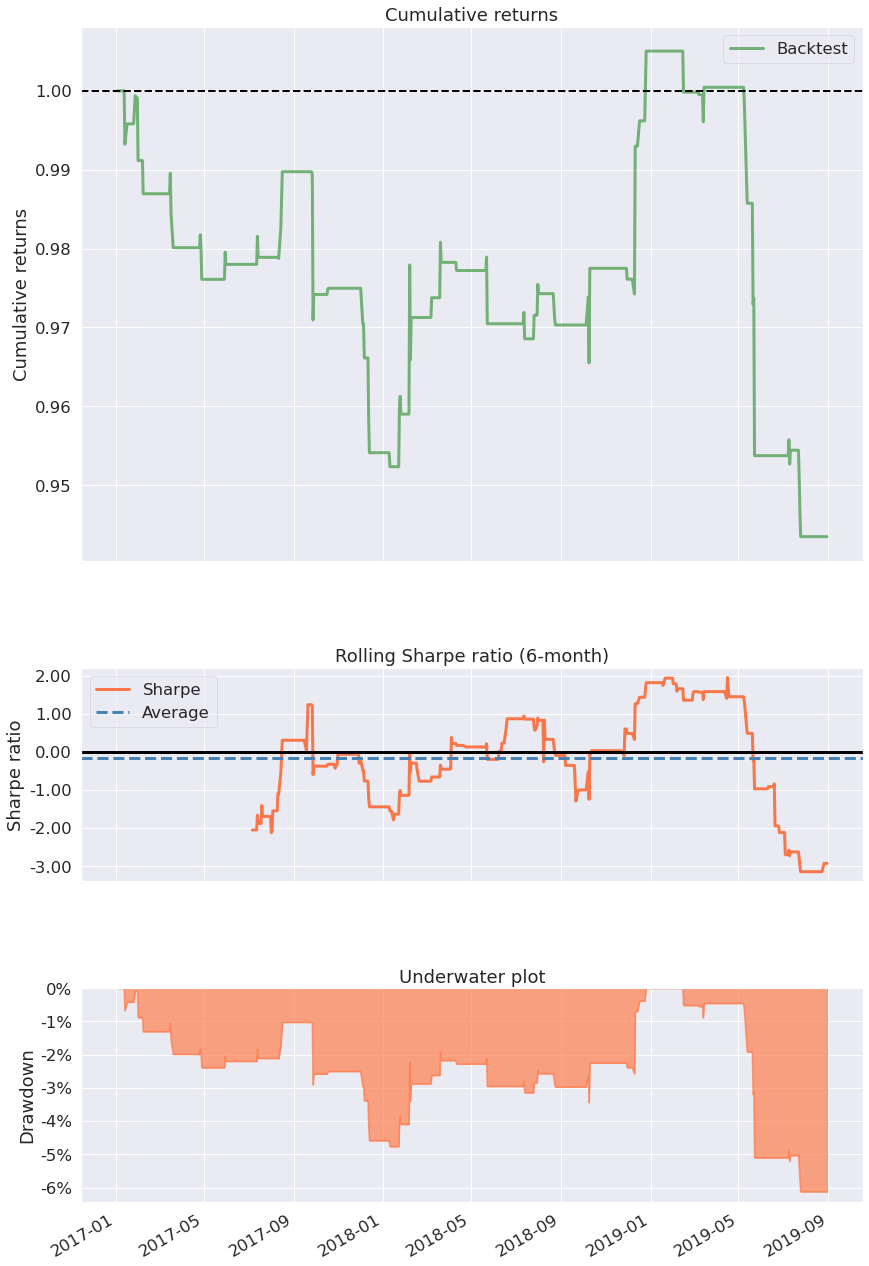

In [92]:
import pyfolio as pf
pf.create_simple_tear_sheet(strategyreturns)